# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
df = pd.read_csv("data/heart_disease_pca.csv")

label_col = "target"
X = df.drop(columns=[label_col])
y = df[label_col]

"Dataset shape:", X.shape

('Dataset shape:', (303, 13))

# Elbow Method

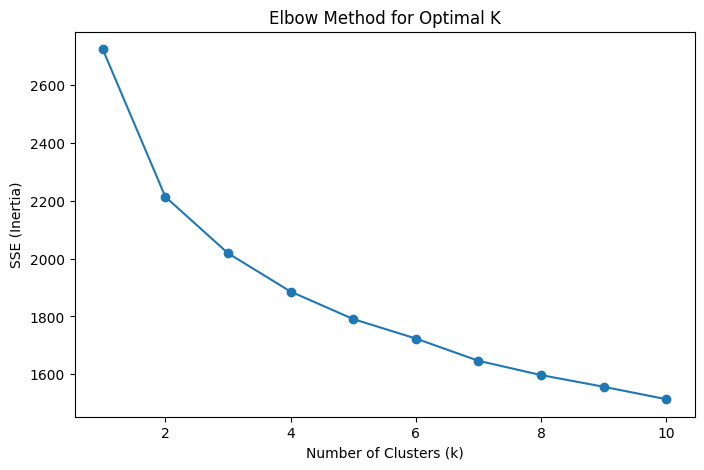

In [3]:
sse = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.show()

# K-Means Clustering

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)
print("K-Means Silhouette Score:", silhouette_score(X, df['kmeans_cluster']))
ari_kmeans = adjusted_rand_score(y, df['kmeans_cluster'])

K-Means Silhouette Score: 0.18685552675890027


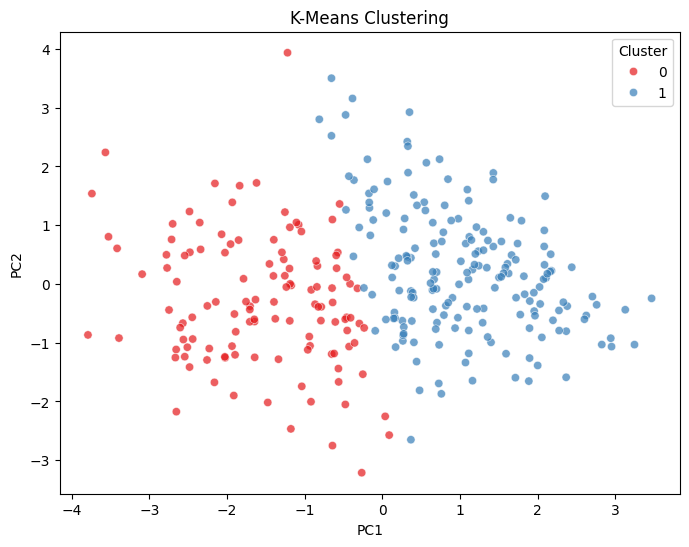

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['kmeans_cluster'], palette="Set1", alpha=0.7)
plt.title("K-Means Clustering")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title="Cluster")
plt.show()

# Hierarchical Clustering

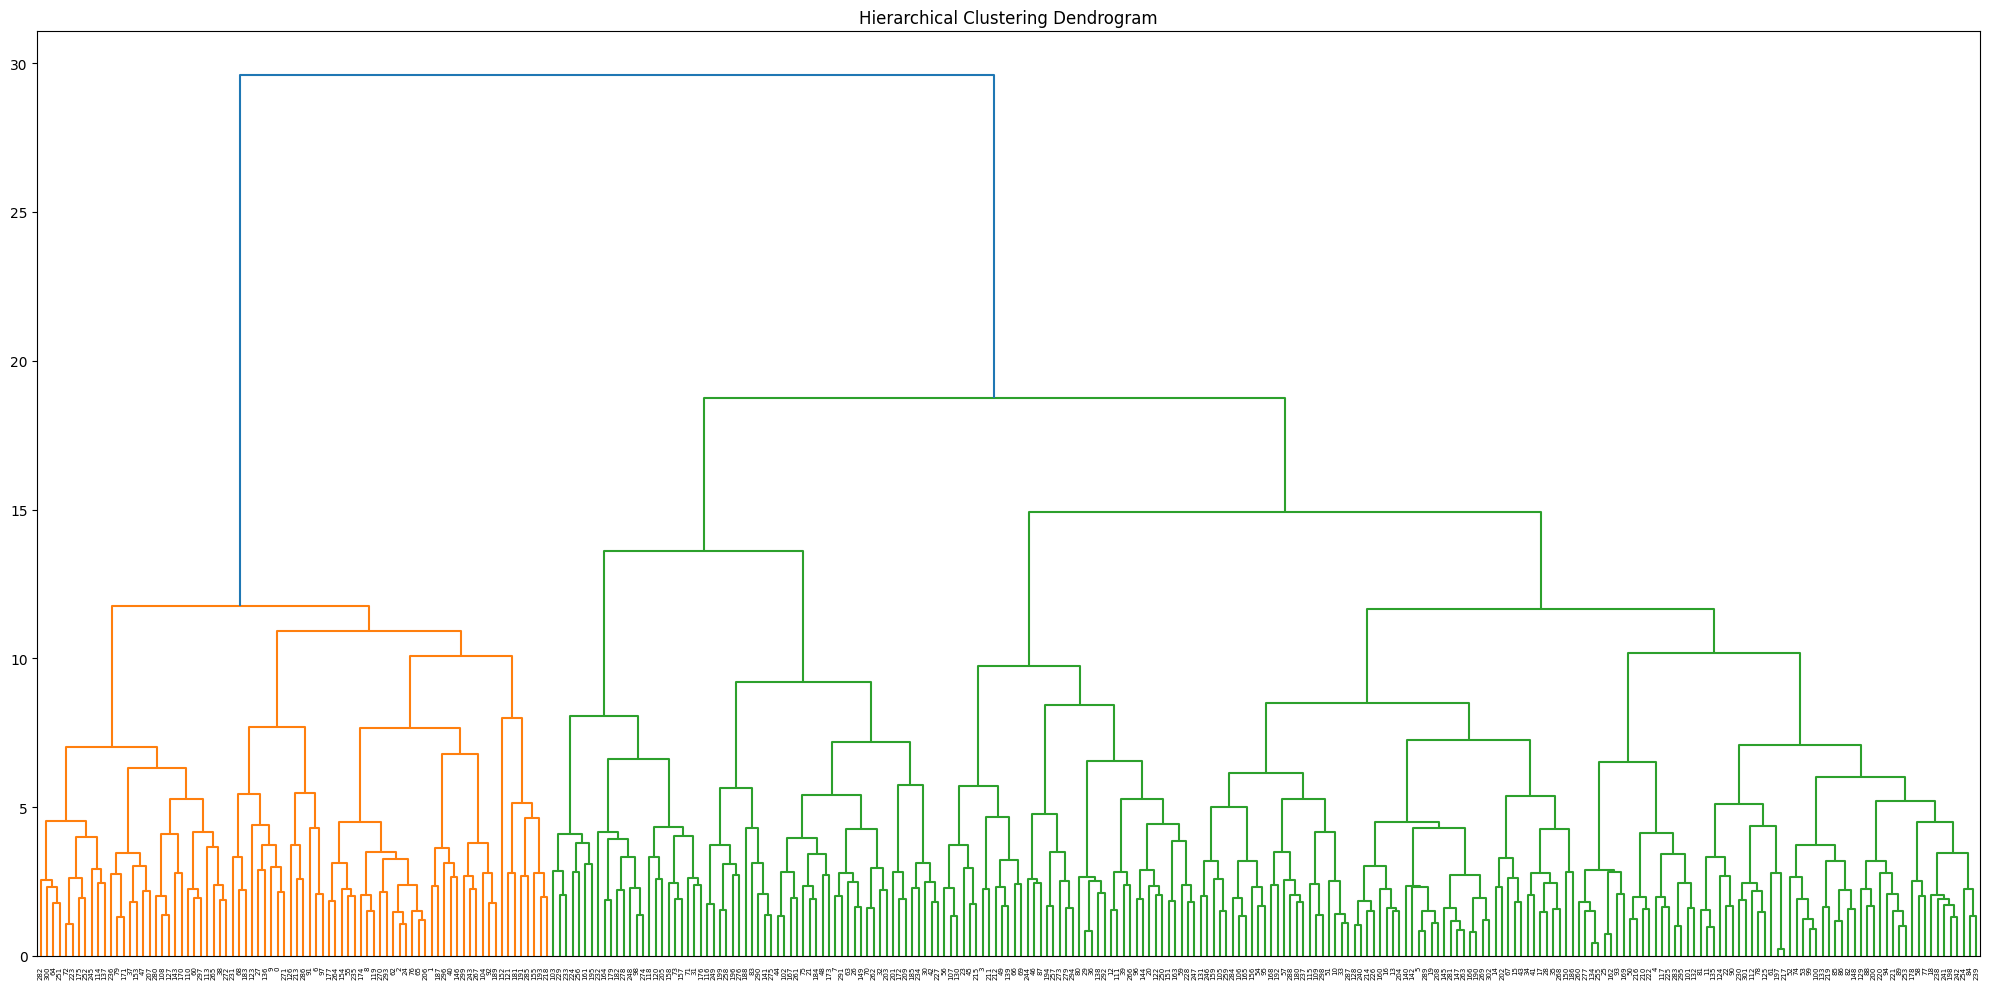

In [6]:
lin = linkage(X,method='ward')

plt.figure(figsize=(20,10))
dendrogram(lin)
plt.title("Hierarchical Clustering Dendrogram")

plt.tight_layout()
plt.show()

# Agglomerative Clustering

In [7]:
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
df['hier_cluster'] = agg.fit_predict(X)
print("Hierarchical Silhouette Score:", silhouette_score(X, df['hier_cluster']))
ari_agg = adjusted_rand_score(y, df['hier_cluster'])

Hierarchical Silhouette Score: 0.1860994793294971


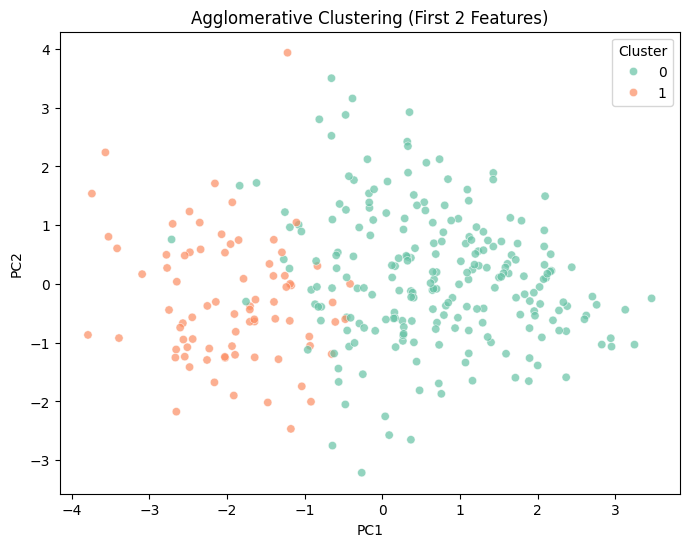

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=df['hier_cluster'], palette="Set2", alpha=0.7)
plt.title("Agglomerative Clustering (First 2 Features)")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.legend(title="Cluster")
plt.show()

# Summary

In [9]:
print("Clustering Performance Summary")
print("KMeans ARI:", ari_kmeans)
print("Agglomerative ARI:", ari_agg)

Clustering Performance Summary
KMeans ARI: 0.3546301094733459
Agglomerative ARI: 0.23871692983435408


# Thanks